In [21]:
using Plots, DifferentialEquations

In [69]:
function euler(dfdx, f0, range, N)
    
    # Preprocess
    
    n = N + 1 # Number of timesteps 
    h = (range[2] - range[1])/n # Timestep length
    fx = zeros(n,2) # Initializing the function array to store the values
    # First column is for x var and second column is for the f variable itself
    
    # Assigning initial conditions
    
    fx[1,1] = range[1]
    fx[1,2] = f0
    
    # Discretization
    
    for i in 2:n
        
        fx[i,2] = fx[i-1,2] + h * dfdx(fx[i-1,1],fx[i-1,2])
        fx[i,1] = range[1] + h * (i-1)
        
    end
    
    return fx
end

euler (generic function with 1 method)

In [70]:
function rk4(dfdx, f0, range, N)
    
    #Preprocess
    
    n = N + 1 # Number of timesteps 
    h = (range[2] - range[1])/n # Timestep length
    fx = zeros(n,2) # Initializing the function array to store the values
    # First column is for x var and second column is for the f variable itself
    
    # Assigning initial conditions
    
    fx[1,1] = range[1]
    fx[1,2] = f0
    
    # Discretization
    
    for i in 2:n
        
        xnm1 = fx[i-1,1]
        fnm1 = fx[i-1,2]
        
        k1 = h * dfdx(xnm1, fnm1)
        k2 = h * dfdx(xnm1 + h / 2, fnm1 + k1 / 2)
        k3 = h * dfdx(xnm1 + h / 2, fnm1 + k2 / 2)
        k4 = h * dfdx(xnm1 + h, fnm1 + k2)
        
        fx[i,2] = fnm1 + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        fx[i,1] = range[1] + h * (i - 1)
                
    end
    
    return fx
end

rk4 (generic function with 1 method)

In [77]:
function main()
    
    # ODEs Examples
    #dvdt(t,v) = 10*sind(30) - v * ((1.7e-1 * 0.5)/(7* 2e-2))
    
    
    
    dvdt(t,v) = v - t^2 + 1
    # Actual solution is: 
    v(t) = -0.5*exp(t) + t^2 + 2t + 1
    tlin = 0:0.2:2
    
    
    
    sol1 = euler(dvdt, 0.5, [0, 2], 10)
    sol2 = rk4(dvdt, 0.5, [0, 2], 10)
    
    # From DE Library (Follow this sintaxe for this LIB): 
    
    df(u,p,t) = u - t^2 + 1
    tspan = (0., 2.)
    prob = ODEProblem(df, 0.5, tspan)
    sol3 = solve(prob)
    
    plot(tlin, v.(tlin), label = "Exact", legend =:bottomright, dpi = 150)
    plot!(sol3.t, sol3.u, markershape = :x, label = "DE Lib")
    plot!(sol2[:,1], sol2[:,2], markershape = :+, label = "RK4")
    plot!(sol1[:,1], sol1[:,2], markershape = :o, label = "Euler")
    
    
    
end

main (generic function with 1 method)

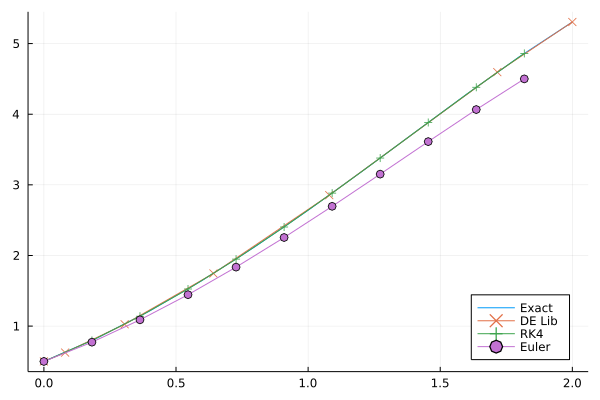

In [78]:
main()